# Distribuciones

Aqui se presenta uno de los conceptos más fundamentales de la estadística: la distribución.
Comenzaremos con las **tablas de frecuencias**, que representan los valores de un conjunto de datos y el número de veces que aparece cada uno de ellos, y las utilizaremos para explorar los datos de la Encuesta Nacional de Crecimiento Familiar (NSFG).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Tablas de frecuencias

Una forma de describir una variable es mediante una **tabla de frecuencias**, que contiene los valores de la variable y sus **frecuencias**, es decir, el número de veces que aparece cada valor.
Esta descripción se denomina **distribución** de la variable.



Para representar distribuciones, se proporciona diferentes funciones que podemos utilizar para calcular y trazar tablas de frecuencias, PMF & CDF.

In [2]:
def from_seq(seq, name=None, normalize=True, sort=True, ascending=True, dropna=True, na_position="last", convert_to="PMF"):
  """Crea un PMF a partir de una secuencia de valores.
  Args:
      seq: iterable
      normalize: si se debe normalizar la serie (i.e, Pmf), por defecto True
      sort: si se debe ordenar la serie por valores, por defecto True
      ascending: si se debe ordenar en orden ascendente, por defecto True
      dropna: si se deben eliminar los valores NaN, por defecto True
      na_position: si es 'first', coloca los NaNs al principio;
                  si es 'last', coloca los NaNs al final.
      convert_to: si es 'FreqTab', Crea una tabla de frecuencia;
                  si es 'PMF' (default), crea una funcion de masa de probabilidad;
                  si es 'CDF', crea una función de distribución acumulada.

  Returns: pd.Series
  """
  if convert_to == "FreqTab":
    normalize=False

  # compute the value counts
  series = pd.Series(seq, name=name).value_counts(normalize=normalize, sort=sort, dropna=dropna)

  # sort in place, if desired
  if sort:
    series.sort_index(inplace=True, ascending=ascending, na_position=na_position)

  if convert_to == "CDF":
    series = np.cumsum(series)

  return series

def get_qs(Tab):
    """Obtener las cantidades.

    Returns: NumPy array
    """
    return Tab.index.values

def get_ps(Tab):
    """Obtener las probabilidades/frecuencias.

    Returns: NumPy array
    """
    return Tab.values

def plot_bar(Tab, xlabel="x", ylabel="y", title="tittle"):
    """Crea un gráfico de barras.

    Args:
        kwargs: se pasa a plt.bar
    """
    qs = get_qs(Tab)
    ps = get_ps(Tab)

    plt.bar(qs, ps)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

Para mostrar cómo funciona, comenzaremos con una pequeña lista de valores.

In [3]:
t = [1.0, 2.0, 2.0, 3.0, 5.0]

Se proporciona un método llamado `from_seq` que toma una secuencia y  utilizando el parametro `convert_to` creamos una dataframe que representara nuestra tabla de frecuencia (`ftab`).

In [4]:
ftab = from_seq(t, convert_to="FreqTab")
ftab

1.0    1
2.0    2
3.0    1
5.0    1
Name: count, dtype: int64

Un dataframe `FreqTab` es un tipo de `Series` de Pandas que contiene valores y sus frecuencias.
En este ejemplo, el valor `1.0` corresponde a la frecuencia 1, el valor `2.0` corresponde a la frecuencia 2, etc.

Tambien proporcionamos un método llamado `plot_bar` que traza la tabla de frecuencias como un `gráfico de barras`.

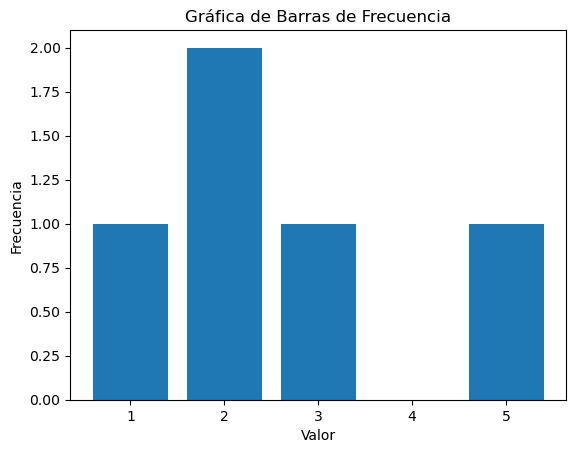

In [5]:
plot_bar(ftab, xlabel='Valor', ylabel='Frecuencia', title='Gráfica de Barras de Frecuencia')
plt.show()

Dado que un `FreqTab` es un `Series` de Pandas, podemos utilizar el operador de corchetes para buscar un valor y obtener su frecuencia.

In [6]:
ftab[2.0].item()

2

In [7]:
ftab[3.0].item()

1

In [8]:
try:
  ftab[4.0].item()
except:
  print("Elemento no encontrado")

Elemento no encontrado


Podemos usar la funcion `get_qs` en el dataframe `ftab`; `qs` significa **"quantities (cantidades)"**, aunque técnicamente no todos los valores son cantidades.

In [9]:
get_qs(ftab)

array([1., 2., 3., 5.])

También podemos usar la funcion `get_ps` que devuelve las frecuencias; aunque `ps` significa **"probabilities (probabilidades)"** en este caso que trabajamos con una tabla de frecuencia, hace referencia a las `frecuencias`.

In [10]:
get_ps(ftab)

array([1, 2, 1, 1], dtype=int64)

El dataframe `FreqTab` proporciona un método `items` que podemos utilizar para recorrer los pares cantidad-frecuencia:

In [11]:
for x, freq in ftab.items():
    print(x, "->", freq)

1.0 -> 1
2.0 -> 2
3.0 -> 1
5.0 -> 1




---

## PMFs

Un objeto `Pmf` es similar a un `FreqTab`, pero contiene probabilidades en lugar de frecuencias.
Por lo tanto, una forma de crear un `Pmf` es partir de un `FreqTab`.
Por ejemplo, aquí hay un `FreqTab` que representa la distribución de valores en una secuencia corta.

La suma de las frecuencias es el tamaño de la secuencia original.

In [12]:
n = ftab.sum()
n.item()

5

Si dividimos las frecuencias por `n`, representan proporciones, en lugar de recuentos.

In [13]:
pmf = ftab / n
pmf

1.0    0.2
2.0    0.4
3.0    0.2
5.0    0.2
Name: count, dtype: float64

Este resultado indica que el 20 % de los valores de la secuencia son 1, el 40 % son 2, y así sucesivamente.

También podemos considerar estas proporciones como probabilidades en el siguiente sentido: si elegimos un valor aleatorio de la secuencia original, la probabilidad de que elijamos el valor 1 es 0.2, la probabilidad de que elijamos el valor 2 es 0.4, y así sucesivamente.

Como hemos dividido por `n`, la suma de las probabilidades es 1, lo que significa que esta distribución está **normalizada**.

In [14]:
pmf.sum().item()

1.0

El dataframe `FreqTab` normalizado representa una **función de masa de probabilidad** (PMF), llamada así porque las probabilidades asociadas a valores discretos también se denominan **"masas de probabilidad"**.



## Una manera mas facil...

En la funcoin `from_seq`, el parametro `convert_to` proporciona la opcion `PMF` que representa una función de masa de probabilidad, por lo que, en lugar de crear un dataframe `FreqTab` y luego normalizarlo, podemos crear un dataframe `PMF` directamente.

In [15]:
ftab = from_seq(t, convert_to="PMF")
ftab

1.0    0.2
2.0    0.4
3.0    0.2
5.0    0.2
Name: proportion, dtype: float64

Los dataframe `Pmf` y `FreqTab` son similares en muchos aspectos.
Para buscar la probabilidad asociada a un valor, podemos utilizar el operador de corchetes.

In [16]:
pmf[2].item()

0.4

Puede modificar un `Pmf` existente asignando o modificando la probabilidad asociada a un valor:

In [17]:
pmf[2] = 0.2
pmf

1.0    0.2
2.0    0.2
3.0    0.2
5.0    0.2
Name: count, dtype: float64

In [18]:
pmf[2] += 0.3
pmf

1.0    0.2
2.0    0.5
3.0    0.2
5.0    0.2
Name: count, dtype: float64

In [19]:
pmf[2] *= 0.5
pmf

1.0    0.20
2.0    0.25
3.0    0.20
5.0    0.20
Name: count, dtype: float64

**NOTA.** Si modifica un `Pmf`, es posible que el resultado no se normalice, es decir, que las probabilidades ya no sumen 1.

In [20]:
pmf.sum().item()

0.8500000000000001

Al igual que un objeto `FreqTab`, un objeto `Pmf` tiene un atributo `qs` que accede a las **cantidades** y un atributo `ps` que accede a las **probabilidades**.

También tiene un método `bar` que traza el `Pmf` como un gráfico de barras y un método `plot` que lo traza como un gráfico de líneas.

In [21]:
pmf = from_seq(t, convert_to="PMF")
pmf

1.0    0.2
2.0    0.4
3.0    0.2
5.0    0.2
Name: proportion, dtype: float64

In [22]:
get_qs(pmf)

array([1., 2., 3., 5.])

In [23]:
get_ps(pmf)

array([0.2, 0.4, 0.2, 0.2])

## Media (valor esperado)

Dado el `Pmf`, aún podemos calcular la media, pero el proceso es diferente: tenemos que multiplicar las probabilidades y las cantidades y sumar los productos.

In [24]:
mean = np.sum(get_ps(pmf) * get_qs(pmf)) # mean = 1 * 0.2 + 2 * 0.4 + 3 * 0.2 + 5 * 0.2
mean.item()

2.6

Observe que *no* tenemos que dividir por `n`, porque ya lo hicimos cuando normalizamos el `Pmf`.


Observe lo que si tratamos de utilizar el metodo `mean` del dataframe de `pandas` por si solo.

In [25]:
pmf.mean().item()

0.25

Podemos utilizar funcion `mean` de `numpy` en la lista de numeros original `t = [1.0, 2.0, 2.0, 3.0, 5.0]` en que se hace lo mismo para mostrar la equivalencia de resultados

In [26]:
np.mean(t).item()

2.6

## Varianza

Dado un `Pmf`, podemos calcular la varianza calculando la desviación de cada cantidad con respecto a la media.

In [27]:
deviations = get_qs(pmf) - mean
deviations

array([-1.6, -0.6,  0.4,  2.4])

A continuación, multiplicamos las **desviaciones al cuadrado** por las **probabilidades** y **sumamos los productos**.

In [28]:
var = np.sum(get_ps(pmf) * deviations**2)
var.item()

1.84

In [29]:
#Desviacion estandar

np.sqrt(var).item()

1.3564659966250536

El método `var` hace lo mismo o el método `std` de `numpy`.

In [30]:
np.var(t).item()

1.8400000000000003

In [31]:
np.std(t).item()

1.3564659966250538

Podemos usar `stats` de `scipy`, que proporciona un método `mode` que encuentra el valor con la probabilidad más alta.

In [32]:
from scipy import stats

stats.mode(t)

ModeResult(mode=2.0, count=2)

# EJERCICIOS

---
---
# Datos NSFG

Cuando empieces a trabajar con un nuevo conjunto de datos, te sugiero que explores las variables que planeas utilizar una por una, y una buena forma de empezar es mirando las tablas de frecuencia.

Como ejemplo, veamos los datos de la Encuesta Nacional de Crecimiento Familiar (NSFG).

Para los ejercicios, cargaremos el archivo de mujeres encuestadas del NSFG, que contiene una fila por cada mujer encuestada.

In [33]:
from os.path import basename, exists

try:
    import statadict
except ImportError:
    %pip install statadict

try:
    import empiricaldist
except ImportError:
    %pip install empiricaldist

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dat.gz")

El libro de códigos para el archivo de mujeres encuestadas se encuentra en <https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Female.pdf>.

El módulo `nsfg.py` proporciona una función que lee el archivo de mujeres encuestadas, limpia algunas de las variables y devuelve un `DataFrame`.



In [34]:
from nsfg import read_fem_resp

resp = read_fem_resp()
resp.shape

(7643, 3092)

Este `DataFrame` contiene 3092 columnas, pero solo utilizaremos algunas de ellas.

### Ejercicio 1

Comenzaremos con `totincr`, que registra los ingresos totales de la familia del encuestado, codificados con un valor del 1 al 14.
Puede consultar el libro de códigos del archivo de encuestados para ver qué nivel de ingresos representa cada valor.

```
TOTINCR (4831 - 4832)

Value Label           Total
1     UNDER $5000     299
2     $5000-$7499     301
3     $7500-$9999     266
4     $10,000-$12,499 421
5     $12,500-$14,999 445
6     $15,000-$19,999 559
7     $20,000-$24,999 583
8     $25,000-$29,999 606
9     $30,000-$34,999 607
10    $35,000-$39,999 468
11    $40,000-$49,999 647
12    $50,000-$59,000 658
13    $60,000-$74,999 623
14    $75,000 OR MORE 1160

Total 7643
```

Cree un objeto `FreqTab` para representar la distribución de esta variable y represéntela en un **gráfico de barras**. Asegurese que la **cuenta de los distintos valores** corresponda con el archivo de encuestados.

totincr
1      299
2      301
3      266
4      421
5      445
6      559
7      583
8      606
9      607
10     468
11     647
12     658
13     623
14    1160
Name: count, dtype: int64

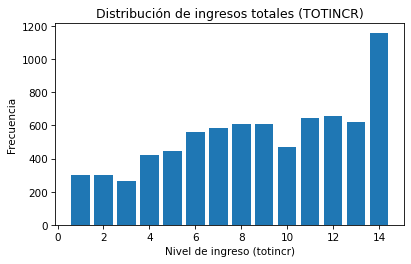

Total de registros: 7643


In [45]:
# Tu codigo va aqui
# Crear el objeto FreqTab para la variable 'totincr'
ftab_totincr = from_seq(resp['totincr'], convert_to="FreqTab")

# Mostrar la tabla de frecuencias
display(ftab_totincr)

# Graficar la distribución de frecuencias
plot_bar(ftab_totincr, xlabel='Nivel de ingreso (totincr)', ylabel='Frecuencia', title='Distribución de ingresos totales (TOTINCR)')
plt.show()

# Verificar que la suma de frecuencias corresponde al total del libro de códigos
print("Total de registros:", ftab_totincr.sum())

### Ejercicio 2

Elabora una tabla de frecuencias de la columna «paridad», `parity`, que registra el número de hijos que tiene cada encuestado.

**¿Cómo describirías la forma de esta distribución?**


parity
0     3230
1     1519
2     1603
3      828
4      309
5       95
6       29
7       15
8        8
9        2
10       3
16       1
22       1
Name: count, dtype: int64

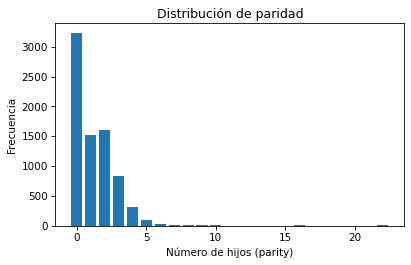

In [46]:
# Tu codigo va aqui
ftab_parity = from_seq(resp['parity'], convert_to="FreqTab")

# Mostrar la tabla de frecuencias
display(ftab_parity)

# Graficar la distribución de frecuencias
plot_bar(ftab_parity, xlabel='Número de hijos (parity)', ylabel='Frecuencia', title='Distribución de paridad')
plt.show()

```
# Tu respuesta va aqui
```
La distribución de la variable parity es asimétrica y está sesgada a la derecha (positivamente), ya que la mayoría de las personas tienen pocos hijos y hay una cola hacia valores más altos de paridad.

### Ejercicio 3

Investigamos si las mujeres con ingresos más altos o más bajos tienen más hijos.
Utilice el método de consulta para seleccionar a los encuestados con los ingresos más altos (nivel 14).


Trace la tabla de frecuencias de `parity` solo para los encuestados con ingresos altos.

parity
0    515
1    229
2    267
3    123
4     19
5      5
7      1
8      1
Name: count, dtype: int64

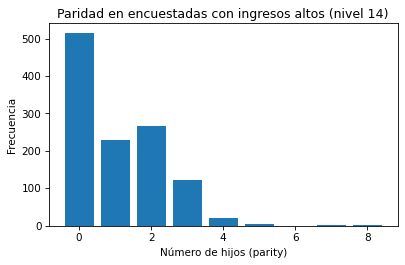

In [47]:
# Tu codigo va aqui
# Seleccionar encuestadas con ingresos más altos (nivel 14)
altos_ingresos = resp[resp['totincr'] == 14]

# Crear la tabla de frecuencias de 'parity' para este grupo
ftab_parity_altos = from_seq(altos_ingresos['parity'], convert_to="FreqTab")

# Mostrar la tabla de frecuencias
display(ftab_parity_altos)

# Graficar la distribución de frecuencias
plot_bar(ftab_parity_altos, xlabel='Número de hijos (parity)', ylabel='Frecuencia', title='Paridad en encuestadas con ingresos altos (nivel 14)')

Compara la `media` de `parity` de las encuestadas con ingresos altos y las demás. Utiliza el metodo de `valor esperado`.

In [49]:
# Tu codigo va aqui
# Media (valor esperado) de parity para encuestadas con ingresos altos (nivel 14)
pmf_parity_altos = from_seq(altos_ingresos['parity'], convert_to="PMF")
media_altos = np.sum(get_ps(pmf_parity_altos) * get_qs(pmf_parity_altos))
print(f"Media de parity (ingresos altos): {media_altos:.2f}")

Media de parity (ingresos altos): 1.08


In [50]:
# Tu codigo va aqui
# Media (valor esperado) de parity para las demás encuestadas
otros_ingresos = resp[resp['totincr'] != 14]
pmf_parity_otros = from_seq(otros_ingresos['parity'], convert_to="PMF")
media_otros = np.sum(get_ps(pmf_parity_otros) * get_qs(pmf_parity_otros))

print(f"Media de parity (otros ingresos): {media_otros:.2f}")

Media de parity (otros ingresos): 1.25


**¿Estos resultados muestran que las personas con ingresos más altos tienen menos hijos, o se te ocurre otra explicación para la diferencia aparente?**

Para ver si esto realmente es cierto podemos verificar esta diferencia calculando el **efecto Cohen** ([1](https://statisticsbyjim.com/basics/cohens-d/), [2](https://datatab.net/tutorial/effect-size-independent-t-test)), **verificar estas fuentes**.

$$
Cohens\_diff = \frac{\mu_1 - \mu_2}{\sigma_{pooled}}
$$

Calcula el tamaño del **efecto de Cohen** para esta diferencia.

* **¿Cómo se compara con la diferencia en la duración del embarazo para los primeros bebés y los demás?**
* **¿Estos resultados muestran que las personas con ingresos más altos tienen menos hijos realmente?**

In [53]:
def cohen_effect_size(group1, group2):
  # Tu codigo va aqui
  mean1 = np.mean(group1)
  mean2 = np.mean(group2)
  var1 = np.var(group1, ddof=1)
  var2 = np.var(group2, ddof=1)
  n1 = len(group1)
  n2 = len(group2)
  pooled_var = ((n1 - 1)*var1 + (n2 - 1)*var2) / (n1 + n2 - 2)
  diff = mean1 - mean2
  return diff / np.sqrt(pooled_var)

# Valores de parity para ambos grupos
parity_altos = altos_ingresos['parity'].dropna()
parity_otros = otros_ingresos['parity'].dropna()

# Calcular y mostrar el efecto de Cohen
cohen_d = cohen_effect_size(parity_altos, parity_otros)
print(f"Efecto de Cohen (d): {cohen_d:.2f}")

Efecto de Cohen (d): -0.13


outcome
1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: count, dtype: int64

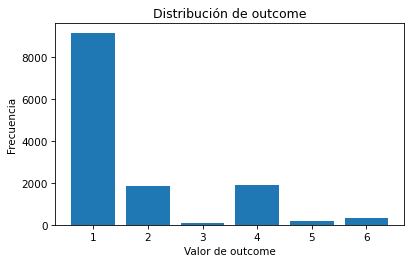

In [58]:
from nsfg import read_fem_preg
preg = read_fem_preg()

# Crear el objeto FreqTab para la variable 'outcome'
ftab_outcome = from_seq(preg['outcome'], convert_to="FreqTab")

# Mostrar la tabla de frecuencias
display(ftab_outcome)

# Graficar la distribución de frecuencias
plot_bar(ftab_outcome, xlabel='Valor de outcome', ylabel='Frecuencia', title='Distribución de outcome')

In [59]:
# Tu codigo va aqui
# Comparación de la duración del embarazo entre primeros bebés y los demás

# Filtrar solo nacimientos vivos (outcome == 1)
nacimientos_vivos = preg[preg['outcome'] == 1]

# Separar primeros bebés (birthord == 1) y los demás (birthord > 1)
primeros_bebes = nacimientos_vivos[nacimientos_vivos['birthord'] == 1]
otros_bebes = nacimientos_vivos[nacimientos_vivos['birthord'] > 1]

# Duración del embarazo en semanas (prglngth)
duracion_primeros = primeros_bebes['prglngth'].dropna()
duracion_otros = otros_bebes['prglngth'].dropna()

# Calcular medias
media_primeros = duracion_primeros.mean()
media_otros = duracion_otros.mean()

# Calcular efecto de Cohen
def cohen_effect_size(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    n1 = len(group1)
    n2 = len(group2)
    pooled_var = ((n1 - 1)*var1 + (n2 - 1)*var2) / (n1 + n2 - 2)
    diff = mean1 - mean2
    return diff / np.sqrt(pooled_var)

cohen_d_embarazo = cohen_effect_size(duracion_primeros, duracion_otros)

print(f"Media duración embarazo (primeros bebés): {media_primeros:.2f} semanas")
print(f"Media duración embarazo (otros bebés): {media_otros:.2f} semanas")
print(f"Efecto de Cohen (d): {cohen_d_embarazo:.2f}")

Media duración embarazo (primeros bebés): 38.60 semanas
Media duración embarazo (otros bebés): 38.52 semanas
Efecto de Cohen (d): 0.03


```
# Tu respuesta va aqui
```
**Comparación con la duración del embarazo:**  
La diferencia en la media de la duración del embarazo entre primeros bebés (38.60 semanas) y los demás (38.52 semanas) es muy pequeña (0.08 semanas). El tamaño del efecto de Cohen (d = 0.03) es considerado **muy pequeño** o prácticamente nulo, lo que indica que no hay evidencia significativa de que la duración del embarazo sea diferente entre primeros bebés y los siguientes en estos datos.

**Las Personas con ingresos mas grandes no necesariamte tienen mas hijos**
El efecto de Cohen calculado es pequeño (d ≈ -0.13), lo que indica que la diferencia en el número de hijos entre mujeres con ingresos altos y el resto es baja. Esto sugiere que, aunque hay una diferencia en la media, no es grande ni necesariamente significativa. Además, pueden influir otros factores como la edad, educación o decisiones personales, por lo que no se puede concluir que el ingreso sea la causa principal. Aunque las mujeres con ingresos más altos parecen tener menos hijos en promedio, esto puede deberse a factores como la edad, educación o decisiones personales relacionadas con la carrera profesional.

### Ejercicio 4

Seleccione la columna `numbabes`, que registra el *número de bebés nacidos vivos* de cada encuestado.
Cree un objeto `FreqTab` y muestre las frecuencias de los valores de esta columna.
Compruebe que coinciden con las frecuencias del [libro de códigos](https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Female.pdf).

* **¿Hay algún valor atipico que deba sustituirse por `NaN` u omitirse?**


A continuación, cree un objeto `Pmf` y represéntelo en un gráfico de barras.

* **¿La distribución es simétrica, sesgada hacia la izquierda o sesgada hacia la derecha?**

In [62]:
# Tu codigo va aqui
# Crear el objeto FreqTab para la variable 'numbabes'
ftab_numbabes = from_seq(resp['numbabes'], convert_to="FreqTab")

# Mostrar la tabla de frecuencias
display(ftab_numbabes)
print("Valores únicos:", ftab_numbabes.index.values)

numbabes
0     3229
1     1519
2     1603
3      828
4      309
5       95
6       29
7       15
8        8
9        2
10       3
16       1
22       1
97       1
Name: count, dtype: int64

Valores únicos: [ 0  1  2  3  4  5  6  7  8  9 10 16 22 97]


In [67]:
# Tu codigo va aqui
# Verificar valores atípicos (por ejemplo, valores muy altos o negativos)
print("Valores únicos:", ftab_numbabes.index.values)
resp['numbabes'] = resp['numbabes'].replace([97,22,16], np.nan)

# Crear el objeto PMF para la variable 'numbabes'
pmf_numbabes = from_seq(resp['numbabes'], convert_to="PMF")

print("Valores únicos:", pmf_numbabes.index.values)

Valores únicos: [ 0  1  2  3  4  5  6  7  8  9 10 16 22 97]
Valores únicos: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


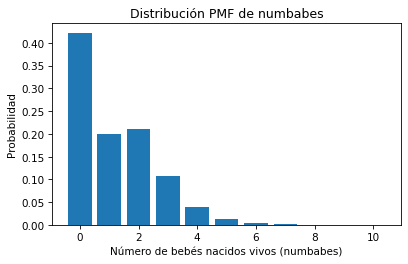

In [68]:
# Tu codigo va aqui
# Graficar la distribución de probabilidades
plot_bar(pmf_numbabes, xlabel='Número de bebés nacidos vivos (numbabes)', ylabel='Probabilidad', title='Distribución PMF de numbabes')
plt.show()

**La grafica Muestra una distribucion asimetrica, sesgada hacia la izquierda**